In [1]:
import pandas as pd

In [2]:
cd C:\Users\juanc\Documents\Universidad\EAFIT\Maestría en Ciencia de Datos y Analítica\Semestre 2\Aprendizaje Automático\Supervisado

C:\Users\juanc\Documents\Universidad\EAFIT\Maestría en Ciencia de Datos y Analítica\Semestre 2\Aprendizaje Automático\Supervisado


In [3]:
pwd

'C:\\Users\\juanc\\Documents\\Universidad\\EAFIT\\Maestría en Ciencia de Datos y Analítica\\Semestre 2\\Aprendizaje Automático\\Supervisado'

In [4]:
# Se puede cargar completo, que tarda mucho
# df = pd.read_csv('WELFake_Dataset.csv/WELFake_Dataset.csv')

# O simplemente una fracción
df = pd.read_csv('WELFake_Dataset.csv/WELFake_Dataset.csv').sample(1000).reset_index(drop=True)

In [5]:
df.head()

,Unnamed: 0,title,text,label
0,37240,Trump visits wounded U.S. service members at m...,"BETHESDA, Md. (Reuters) - President Donald Tru...",0
1,36660,Ex-Illinois Governor Blagojevich loses bid to ...,(Reuters) - Former Illinois governor Rod Blago...,0
2,40230,OBAMA’S EPA PUSHES FOR TOUGHER MILEAGE STANDAR...,The EPA continues to push for more and more re...,1
3,4319,Kenyan police say four people killed during op...,NAIROBI (Reuters) - Kenya s police said on Fri...,0
4,7955,U.S. officials warn of ISIS' new caliphate: cy...,WASHINGTON (Reuters) - The collapse of Islamic...,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   title       989 non-null    object
 2   text        1000 non-null   object
 3   label       1000 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 31.4+ KB


In [7]:
df.isnull().sum()

Unnamed: 0     0
title         11
text           0
label          0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

## Se quitan instancias con muy poco texto, se decide en base a la longitud del texto respecto a la longitud del título promedio

In [10]:
df.head()

,Unnamed: 0,title,text,label
0,37240,Trump visits wounded U.S. service members at m...,"BETHESDA, Md. (Reuters) - President Donald Tru...",0
1,36660,Ex-Illinois Governor Blagojevich loses bid to ...,(Reuters) - Former Illinois governor Rod Blago...,0
2,40230,OBAMA’S EPA PUSHES FOR TOUGHER MILEAGE STANDAR...,The EPA continues to push for more and more re...,1
3,4319,Kenyan police say four people killed during op...,NAIROBI (Reuters) - Kenya s police said on Fri...,0
4,7955,U.S. officials warn of ISIS' new caliphate: cy...,WASHINGTON (Reuters) - The collapse of Islamic...,0


In [11]:
df.title.apply(len).mean()

77.56723963599596

In [12]:
# Identificar indices donde se da una longitud de texto menor a la longitud del título promedio
df.drop(df.loc[df.text.apply(len) <= 78].index, inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 966 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  966 non-null    int64 
 1   title       966 non-null    object
 2   text        966 non-null    object
 3   label       966 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 37.7+ KB


In [14]:
conteo_categorias=df['label'].value_counts()
tabla_categorias=pd.DataFrame()
tabla_categorias['conteo']=conteo_categorias
tabla_categorias['porcentaje']=(conteo_categorias/df.shape[0]*100)
tabla_categorias['acumulado']=tabla_categorias['porcentaje'].cumsum()

In [15]:
# (0 = fake and 1 = real).
tabla_categorias

,conteo,porcentaje,acumulado
0,489,50.621118,50.621118
1,477,49.378882,100.000000


# Preparación

In [16]:
import re
import nltk
import numpy as np
import matplotlib.pyplot as plt

In [17]:
#nltk.download('stopwords')
#nltk.download('words')
stopwords_nltk = set(nltk.corpus.stopwords.words('english'))

In [76]:
df['text'][30]

"Taming the corporate media beast How Putin Derailed the West's Grand Project to Remake the World \nThe improbable alliance of Russia, Syria, Iran and Hezbollah has checked Washington's grand project to remake the world by erasing borders, liquidating states, and removing strong, secular leaders. Originally appeared at CounterPunch \n“Nation state as a fundamental unit of man’s organized life has ceased to be the principal creative force: International banks and multinational corporations are acting and planning in terms that are far in advance of the political concepts of the nation-state.” \n— Zbigniew Brzezinski, “Between Two Ages: The Technetronic Era”, 1971 \n“I’m going to continue to push for a no-fly zone and safe havens within Syria….not only to help protect the Syrians and prevent the constant outflow of refugees, but to gain some leverage on both the Syrian government and the Russians.” \n— Former Secretary of State Hillary Clinton, Third Presidential Debate \nWhy is Hillary 

In [19]:
%time datos = df.rename(columns={'text':'tokens'})

CPU times: total: 31.2 ms
Wall time: 971 µs


In [20]:
datos = datos.drop('Unnamed: 0',axis=1)

# Tokenización

In [21]:
# %time datos['tokens'].sample(100)=datos['tokens'].apply(nltk.word_tokenize)
%time datos['tokens']=datos['tokens'].apply(nltk.word_tokenize)

CPU times: total: 2.75 s
Wall time: 2.74 s


In [22]:
datos.head()

,title,tokens,label
0,Trump visits wounded U.S. service members at m...,"[BETHESDA, ,, Md, ., (, Reuters, ), -, Preside...",0
1,Ex-Illinois Governor Blagojevich loses bid to ...,"[(, Reuters, ), -, Former, Illinois, governor,...",0
2,OBAMA’S EPA PUSHES FOR TOUGHER MILEAGE STANDAR...,"[The, EPA, continues, to, push, for, more, and...",1
3,Kenyan police say four people killed during op...,"[NAIROBI, (, Reuters, ), -, Kenya, s, police, ...",0
4,U.S. officials warn of ISIS' new caliphate: cy...,"[WASHINGTON, (, Reuters, ), -, The, collapse, ...",0


In [23]:
def mostrar_frecuencias(datos):
    tokens_concatenate=np.concatenate(datos['tokens'])
    fdist = nltk.FreqDist(tokens_concatenate)
    topwords = fdist.most_common(20)
    x,y = zip(*topwords)
    print('Numero de tokens:',len(fdist))
    for i,token in enumerate(topwords[0:20]):
        print(i+1,token)
    plt.figure(figsize=(8,6))
    plt.title("Frecuencias de Palabras para Noticias " + str(var))
    plt.bar(x,y)
    plt.xticks(rotation=90)
    plt.show()

Se muestran los tokens sin limpiar para resaltar la importancia de este proceso, más adelante se mostrarán los tokens para noticias falsas y reales

Numero de tokens: 22726
1 (',', 15519)
2 ('the', 14486)
3 ('.', 11393)
4 ('to', 7587)
5 ('of', 7193)
6 ('a', 6505)
7 ('and', 6205)
8 ('in', 5623)
9 ('’', 3453)
10 ('that', 3370)
11 ('s', 3193)
12 ('”', 2795)
13 ('“', 2793)
14 ('on', 2763)
15 ('said', 2680)
16 ('for', 2514)
17 ('is', 2081)
18 ('The', 1810)
19 ('was', 1765)
20 ('with', 1743)


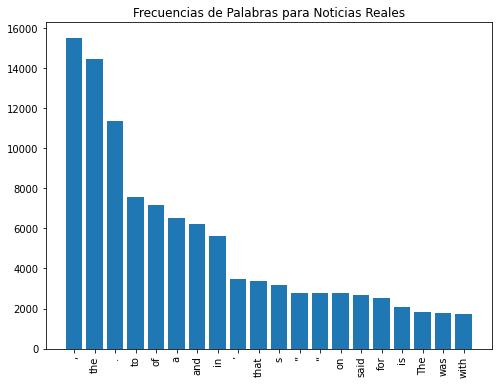

CPU times: total: 516 ms
Wall time: 527 ms


In [24]:
# Se muestra frecuencia de noticias reales
var = "Reales"
%time mostrar_frecuencias(datos.loc[datos['label'] == 0].reset_index(drop=True))

Numero de tokens: 22726
1 (',', 15519)
2 ('the', 14486)
3 ('.', 11393)
4 ('to', 7587)
5 ('of', 7193)
6 ('a', 6505)
7 ('and', 6205)
8 ('in', 5623)
9 ('’', 3453)
10 ('that', 3370)
11 ('s', 3193)
12 ('”', 2795)
13 ('“', 2793)
14 ('on', 2763)
15 ('said', 2680)
16 ('for', 2514)
17 ('is', 2081)
18 ('The', 1810)
19 ('was', 1765)
20 ('with', 1743)


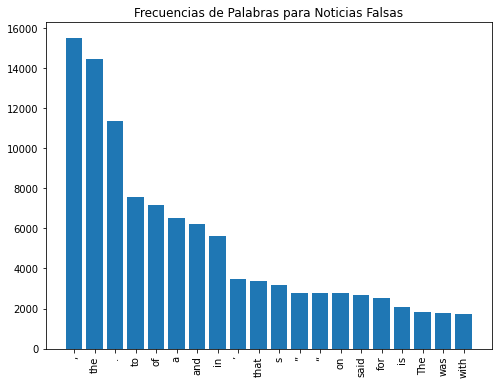

CPU times: total: 500 ms
Wall time: 506 ms


In [25]:
# Se muestra frecuencia de noticias falsas
var = "Falsas"
%time mostrar_frecuencias(datos.loc[datos['label'] == 0].reset_index(drop=True))

# Limpieza de tokens

In [26]:
import gensim
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS

In [27]:
stop_words = nltk.corpus.stopwords.words('english')

In [28]:
def limpiar_tokens(tokens):
    # Esta función quita todos los caracteres que no sean alfabeticos
    tokens=[re.sub(r'[0-9\. ]+','',token) for token in tokens] # quitar números
    tokens=[re.sub(r'[^A-Za-z]+','',token) for token in tokens] # quitar otros caracteres
    #tokens=[token for token in tokens if token not in stopwords_nltk]
    tokens=[token for token in tokens if token not in stop_words]
    tokens=[token.lower() for token in tokens if len(token)>2]
    return tokens

In [29]:
%time datos['tokens']=datos['tokens'].apply(limpiar_tokens)

CPU times: total: 2.11 s
Wall time: 2.14 s


## Stemming

In [30]:
stemmer=nltk.stem.SnowballStemmer("english")

In [31]:
%time datos['tokens']=datos['tokens'].apply(lambda tokens: [stemmer.stem(w) for w in tokens])

CPU times: total: 3.12 s
Wall time: 3.14 s


# Limpieza adicional

In [32]:
# Extensión de stopwords
stop_words.extend(['the','said','trump'])

In [33]:
%time datos['tokens']=datos['tokens'].apply(limpiar_tokens)

CPU times: total: 1.25 s
Wall time: 1.25 s


Se muestra como cambia las frecuencias de datos el proceso de stemming y remoción de caracteres no alfabeticos

Numero de tokens: 14391
1 ('clinton', 642)
2 ('one', 608)
3 ('peopl', 584)
4 ('would', 569)
5 ('state', 539)
6 ('presid', 512)
7 ('like', 477)
8 ('time', 444)
9 ('say', 414)
10 ('hillari', 401)
11 ('even', 385)
12 ('year', 367)
13 ('also', 367)
14 ('elect', 362)
15 ('new', 357)
16 ('report', 357)
17 ('american', 346)
18 ('obama', 330)
19 ('donald', 328)
20 ('make', 326)


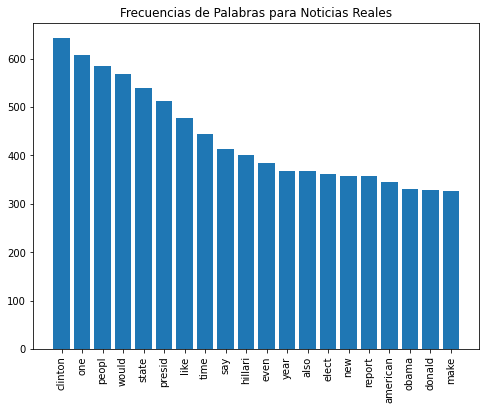

CPU times: total: 312 ms
Wall time: 309 ms


In [34]:
var = "Reales"
%time mostrar_frecuencias(datos.loc[datos['label'] == 1].reset_index(drop=True))

Numero de tokens: 12824
1 ('state', 875)
2 ('would', 824)
3 ('presid', 747)
4 ('year', 673)
5 ('new', 643)
6 ('one', 622)
7 ('peopl', 566)
8 ('republican', 520)
9 ('say', 510)
10 ('also', 489)
11 ('elect', 468)
12 ('govern', 465)
13 ('nation', 451)
14 ('clinton', 451)
15 ('time', 449)
16 ('democrat', 428)
17 ('like', 424)
18 ('could', 416)
19 ('hous', 411)
20 ('countri', 407)


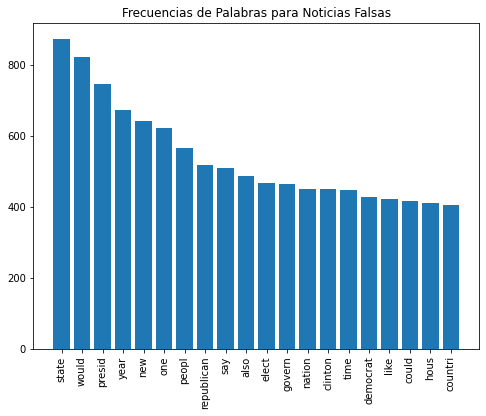

CPU times: total: 297 ms
Wall time: 290 ms


In [35]:
var = "Falsas"
%time mostrar_frecuencias(datos.loc[datos['label'] == 0].reset_index(drop=True))

Se aprecia la mejora en la calidad de las palabaras para el BoW

# Implementación de Algoritmos

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
import ast
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report, recall_score, f1_score, precision_recall_fscore_support

In [37]:
datos = datos.reset_index(drop=True)

In [38]:
datos.head()

,title,tokens,label
0,Trump visits wounded U.S. service members at m...,"[bethesda, reuter, presid, donald, visit, woun...",0
1,Ex-Illinois Governor Blagojevich loses bid to ...,"[reuter, former, illinoi, governor, rod, blago...",0
2,OBAMA’S EPA PUSHES FOR TOUGHER MILEAGE STANDAR...,"[epa, continu, push, restrict, emiss, obama, a...",1
3,Kenyan police say four people killed during op...,"[nairobi, reuter, kenya, polic, friday, four, ...",0
4,U.S. officials warn of ISIS' new caliphate: cy...,"[washington, reuter, collaps, islam, state, se...",0


In [39]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   966 non-null    object
 1   tokens  966 non-null    object
 2   label   966 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 22.8+ KB


In [40]:
def literal_return(val):
    try:
        return ast.literal_eval(val)
    except ValueError:
        return (val)

datos.tokens=datos['tokens'].apply(literal_return)

# Matriz TF-IDF

In [41]:
%time fdist = nltk.FreqDist(np.concatenate(datos['tokens'].reset_index(drop=True))) #].sampe(10000)
%time tokens=fdist.most_common(len(fdist))
%time tokens_tf=pd.DataFrame(tokens,columns=['token','TF'])

CPU times: total: 328 ms
Wall time: 342 ms
CPU times: total: 0 ns
Wall time: 3.99 ms
CPU times: total: 15.6 ms
Wall time: 5.98 ms


In [42]:
fdist

FreqDist({'state': 1414, 'would': 1393, 'presid': 1259, 'one': 1230, 'peopl': 1150, 'clinton': 1093, 'year': 1040, 'new': 1000, 'say': 924, 'like': 901, ...})

In [43]:
tokens_tf.shape

(20365, 2)

In [44]:
tokens_tf.query("TF>1",inplace=True)
tokens_tf.shape

(10841, 2)

In [45]:
tokens_tf.head()

,token,TF
0,state,1414
1,would,1393
2,presid,1259
3,one,1230
4,peopl,1150


In [46]:
query="TF<=100000 and TF>=1"
tokens_tf.query(query)

,token,TF
0,state,1414
1,would,1393
2,presid,1259
3,one,1230
4,peopl,1150
...,...,...
10836,rockvill,2
10837,slavo,2
10838,maasssaid,2
10839,starboard,2


In [47]:
bow = tokens_tf.query(query).token.values
bow.shape

(10841,)

In [48]:
bow

array(['state', 'would', 'presid', ..., 'maasssaid', 'starboard', 'spade'],
      dtype=object)

In [49]:
%time tfidf=pd.DataFrame(TfidfVectorizer(vocabulary=bow).fit_transform(datos['tokens'].str.join(" ")).toarray(), columns=bow)

CPU times: total: 203 ms
Wall time: 204 ms


In [50]:
tfidf

,state,would,presid,one,peopl,clinton,year,new,say,like,...,gramegna,kazimir,blackheart,sanchez,milian,rockvill,slavo,maasssaid,starboard,spade
0,0.000000,0.000000,0.093437,0.022224,0.000000,0.0,0.024718,0.000000,0.024563,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.042037,0.000000,0.000000,0.014577,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.000000,0.101786,0.026372,0.025091,0.000000,0.0,0.000000,0.059599,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.059344,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.038820,0.000000,0.019293,0.000000,0.039247,0.0,0.020415,0.021801,0.020288,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,0.037002,0.088719,0.000000,0.000000,0.093521,0.0,0.116753,0.020779,0.019337,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
962,0.090201,0.037076,0.038425,0.036558,0.000000,0.0,0.000000,0.014473,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
963,0.008824,0.008463,0.000000,0.000000,0.000000,0.0,0.027844,0.000000,0.000000,0.028966,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.075907,0.000000
964,0.000000,0.000000,0.000000,0.030330,0.097274,0.0,0.033733,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.275882


In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    tfidf.values, datos.label.values, test_size=0.2, random_state=42)

In [52]:
cms_train=[]
cms_test=[]
accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
recall_train = []
recall_test = []
reporte_train = []
reporte_test = []
max_depths = np.arange(2,22,2) #(10,110, 10)
for max_depth in max_depths:
    print("max_depth:",max_depth)
    tree = DecisionTreeClassifier(max_depth=max_depth,class_weight='balanced')
    tree.fit(X_train, y_train)

    predicciones_train=tree.predict(X_train)
    predicciones_test=tree.predict(X_test)

    cms_train.append(confusion_matrix(y_train,predicciones_train))
    cms_test.append(confusion_matrix(y_test,predicciones_test))
    accuracy_train.append(accuracy_score(y_train,predicciones_train))
    accuracy_test.append(accuracy_score(y_test,predicciones_test))
    f1_train.append(f1_score(y_train,predicciones_train,average='weighted'))
    f1_test.append(f1_score(y_test,predicciones_test,average='weighted'))
    recall_train.append(recall_score(y_train,predicciones_train,average='weighted'))
    recall_test.append(recall_score(y_test,predicciones_test,average='weighted'))
    reporte_train.append(precision_recall_fscore_support(y_train,predicciones_train))
    reporte_test.append(precision_recall_fscore_support(y_test,predicciones_test))
    
    print("Train:")
    print(cms_train[-1])
    print(classification_report(y_train,predicciones_train))

    print("Test:")
    print(cms_test[-1])
    print(classification_report(y_test,predicciones_test))
    print("-----------")

max_depth: 2
Train:
[[252 142]
 [  3 375]]
              precision    recall  f1-score   support

           0       0.99      0.64      0.78       394
           1       0.73      0.99      0.84       378

    accuracy                           0.81       772
   macro avg       0.86      0.82      0.81       772
weighted avg       0.86      0.81      0.81       772

Test:
[[56 39]
 [ 1 98]]
              precision    recall  f1-score   support

           0       0.98      0.59      0.74        95
           1       0.72      0.99      0.83        99

    accuracy                           0.79       194
   macro avg       0.85      0.79      0.78       194
weighted avg       0.85      0.79      0.78       194

-----------
max_depth: 4
Train:
[[346  48]
 [ 45 333]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       394
           1       0.87      0.88      0.88       378

    accuracy                           0.88       772
   ma

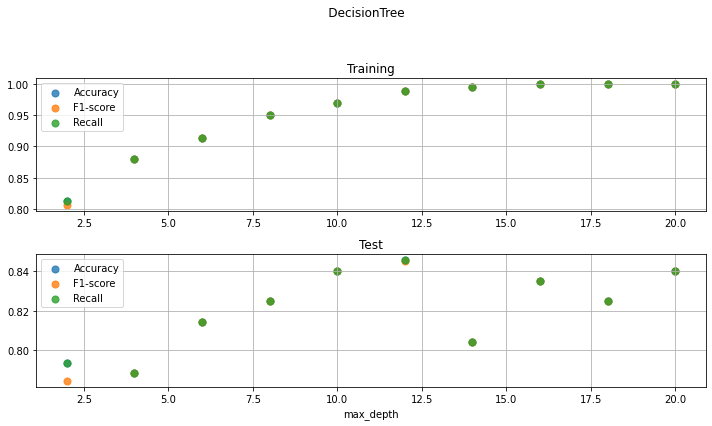

In [53]:
fig,ax=plt.subplots(2,1,figsize=(10,6),tight_layout=True)
fig.suptitle("     DecisionTree")
ax[0].scatter(max_depths,accuracy_train,s=50,alpha=0.8, label = 'Accuracy')
ax[0].scatter(max_depths,f1_train,s=50,alpha=0.8, label = 'F1-score')
ax[0].scatter(max_depths,recall_train,s=50,alpha=0.8, label = 'Recall')
ax[0].legend()
ax[0].grid()
ax[0].set_title('\n\nTraining')
# ax[0].set_xlabel('max_depth')

ax[1].scatter(max_depths,accuracy_test,s=50,alpha=0.8, label = 'Accuracy')
ax[1].scatter(max_depths,f1_test,s=50,alpha=0.8, label = 'F1-score')
ax[1].scatter(max_depths,recall_test,s=50,alpha=0.8, label = 'Recall')
ax[1].legend()
ax[1].grid()
ax[1].set_title('Test')
ax[1].set_xlabel('max_depth')

plt.show()

# Validación Cruzada para el modelo out of sample

In [54]:
from sklearn.model_selection import cross_validate

In [55]:
#datos = pd.read_csv('data_equilibrada.csv')
#datos.tokens=datos.tokens.apply(literal_eval)
#bow = pd.read_csv('bow.csv')
#tfidf=pd.DataFrame(TfidfVectorizer(vocabulary=bow.token.values).fit_transform(datos['tokens'].str.join(" ")).toarray(), columns=bow.token.values)
X=tfidf.values
y=datos.label.values

In [56]:
dt = DecisionTreeClassifier(max_depth=8,class_weight='balanced')
cv_dt=cross_validate(dt, X, y, cv=20,scoring=('accuracy','f1_weighted','recall_weighted'),n_jobs=-1)
pd.DataFrame(cv_dt).describe()

,fit_time,score_time,test_accuracy,test_f1_weighted,test_recall_weighted
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,1.538229,0.007491,0.811756,0.810979,0.811756
std,0.277823,0.004270,0.060229,0.060453,0.060229
min,1.050119,0.002987,0.708333,0.708333,0.708333
25%,1.436271,0.005984,0.766901,0.766672,0.766901
50%,1.535173,0.006981,0.812500,0.812500,0.812500
75%,1.754012,0.007626,0.854167,0.851647,0.854167
max,1.959022,0.023936,0.958333,0.958333,0.958333


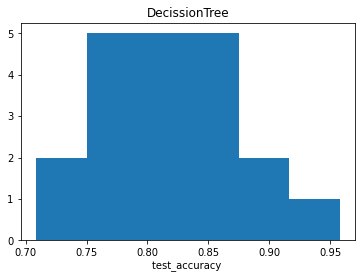

In [57]:
plt.hist(cv_dt['test_accuracy'],bins=6)
plt.title("DecissionTree")
plt.xlabel("test_accuracy ")
plt.show()

# Calibración de Hiperparámetros

In [58]:
# Import moduels for Hyperparameter Tuning
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [59]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, 30], "min_samples_leaf": randint(1,20), "criterion": ["gini", "entropy"], "splitter": ["best", "random"]}

In [60]:
# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

In [61]:
# Instantiate the RandomizedSearchCV objetc: tree_cv, cv is k-folds.
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

In [62]:
# Fit it to the data
tree_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 30],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002398AF79780>,
                                        'splitter': ['best', 'random']})

In [63]:
# Print the tunred parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 9, 'splitter': 'best'}
Best score is 0.8458399664851278


In [64]:
predicciones_test2=tree_cv.predict(X_test)

In [65]:
accuracy_score(y_test,predicciones_test2)

0.788659793814433

In [66]:
confusion_matrix(y_test,predicciones_test2)
accuracy_score(y_test,predicciones_test2)
f1_score(y_test,predicciones_test2,average='weighted')
recall_score(y_test,predicciones_test2,average='weighted')
precision_recall_fscore_support(y_test,predicciones_test2)

(array([0.79347826, 0.78431373]),
 array([0.76842105, 0.80808081]),
 array([0.78074866, 0.7960199 ]),
 array([95, 99], dtype=int64))

In [67]:
print("Test:")
print(cms_test[-1])
print(classification_report(y_test,predicciones_test))
print("-----------")

Test:
[[78 17]
 [14 85]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.83        95
           1       0.83      0.86      0.85        99

    accuracy                           0.84       194
   macro avg       0.84      0.84      0.84       194
weighted avg       0.84      0.84      0.84       194

-----------
